In [6]:
import qiskit as qk
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])

#copy for different measurement
measure_Z = qk.QuantumCircuit(qr,cr)
measure_Z.measure(qr,cr)

measure_X = qk.QuantumCircuit(qr,cr)
measure_X.h(qr)
measure_X.measure(qr,cr)

#
test_Z = qc + measure_Z
test_X = qc + measure_X

my_backend = qk.Aer.get_backend("qasm_simulator")

job1 = qk.execute([test_Z, test_X], backend=my_backend,shots=1000)
result1 = job1.result()
result1.get_counts(test_Z)

{'00': 490, '11': 510}

In [11]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result1.get_counts(test_Z))

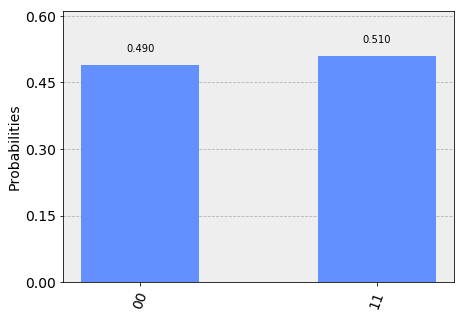

In [12]:
plot_histogram(result1.get_counts(test_X))